In [1]:
import blinpy as bp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse
from scipy.optimize import minimize
from uni_helpers import *
from pygam.datasets import mcycle
from sklearn.model_selection import train_test_split
%matplotlib inline

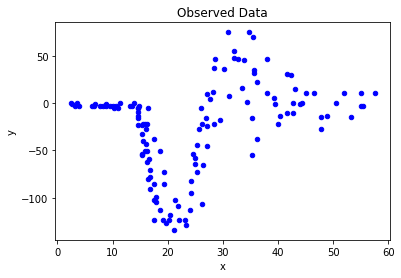

In [2]:
# generate data
X, y = mcycle(return_X_y=True)
plt.scatter(X,y, color='blue', s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Observed Data')
plt.savefig("univariate_figures/original.pdf", format="pdf", bbox_inches="tight")
plt.show()

      Model  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0    smooth          379.337482                19.456262            13.715731   
1  periodic          379.995288                19.473015            13.782760   
2      both          379.995288                19.473015            13.782760   

   R2 Score  
0  0.835916  
1  0.835633  
2  0.835633  


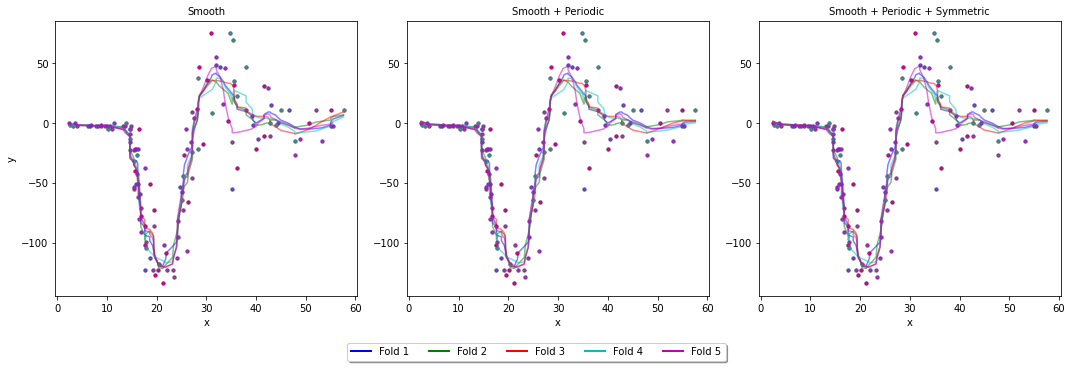

In [3]:
perf_pp , fig = fit_difference_priors(X, y, n_splits=5)
fig.savefig("univariate_figures/pp.pdf", format="pdf", bbox_inches="tight")
print(perf_pp)
plt.show()

               Model  Mean Squared Error  Root Mean Squared Error  \
0  Linear Regression         1962.317067                44.058776   

   Mean Absolute Error  R2 Score  
0            35.979213  0.109514  


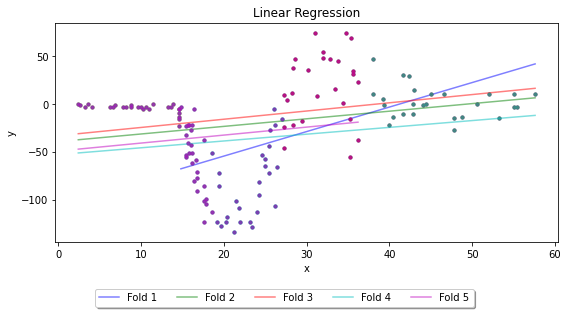

In [4]:
perf_lm, fig =  fit_linear_regression(X, y, n_splits=5)
fig.savefig("univariate_figures/linear_regression.pdf", format="pdf", bbox_inches="tight")
print(perf_lm)
plt.show()

        Model  Mean Squared Error  Root Mean Squared Error  \
0  exp square         1762.658914                41.968374   
1    rat quad         1826.047936                42.715840   
2     orn uhl          487.548589                22.064398   

   Mean Absolute Error  R2 Score  
0            34.643430  0.236586  
1            35.013561  0.209186  
2            16.871116  0.788772  


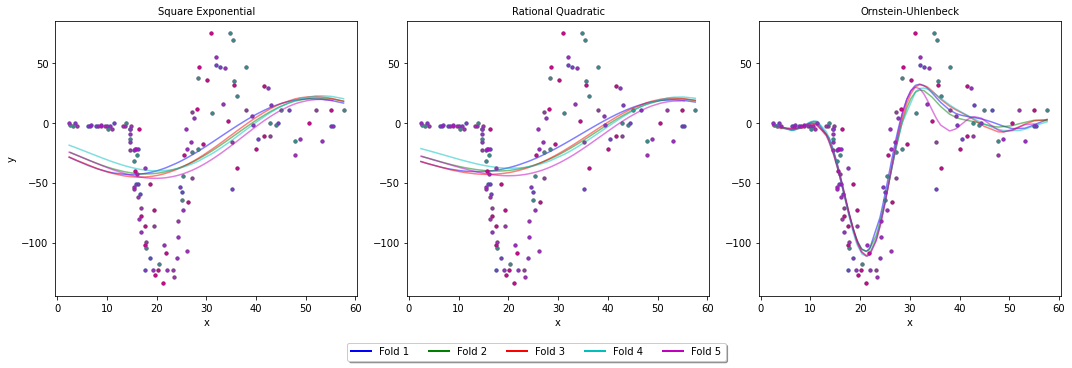

In [5]:
perf_gp, fig = fit_gp_gammy_univariate(X,y)
fig.savefig("univariate_figures/gammy.pdf", format="pdf", bbox_inches="tight")
print(perf_gp)
plt.show()

           Model  Mean Squared Error  Root Mean Squared Error  \
0  Random Forest          205.311517                14.320601   

   Mean Absolute Error  R2 Score  
0             9.777729   0.91103  


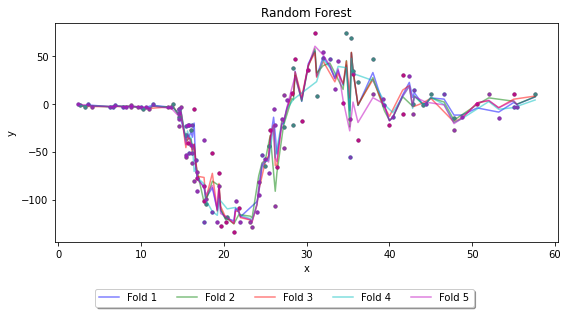

In [6]:
perf_rf, fig =  fit_random_forest(X, y, n_splits=5)
fig.savefig("univariate_figures/rf.pdf", format="pdf", bbox_inches="tight")
print(perf_rf)
plt.show()

                              Model  Mean Squared Error  \
0  Frequentist Penalized Regression          476.695441   

   Root Mean Squared Error  Mean Absolute Error  R2 Score  
0                21.819583             16.57895  0.793471  


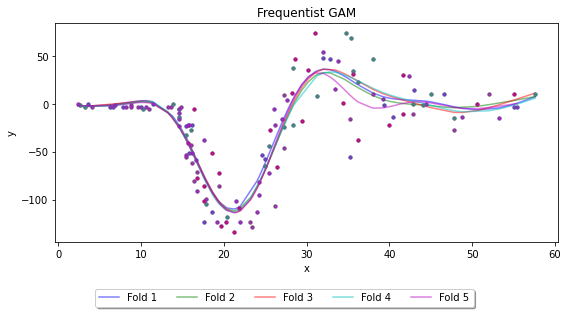

In [7]:
perf_gam , fig = fit_gam_regression(X, y, n_splits=5)
fig.savefig("univariate_figures/frequentist_gam.pdf", format="pdf", bbox_inches="tight")
print(perf_gam)
plt.show()


In [8]:
result = pd.DataFrame(pd.concat([perf_gp, perf_pp, perf_lm, perf_rf, perf_gam], ignore_index=True))
result = result.round(5)
result.head(10)

,Model,Mean Squared Error,Root Mean Squared Error,Mean Absolute Error,R2 Score
0,exp square,1762.65891,41.96837,34.64343,0.23659
1,rat quad,1826.04794,42.71584,35.01356,0.20919
2,orn uhl,487.54859,22.06440,16.87112,0.78877
3,smooth,379.33748,19.45626,13.71573,0.83592
4,periodic,379.99529,19.47301,13.78276,0.83563
5,both,379.99529,19.47301,13.78276,0.83563
6,Linear Regression,1962.31707,44.05878,35.97921,0.10951
7,Random Forest,205.31152,14.32060,9.77773,0.91103
8,Frequentist Penalized Regression,476.69544,21.81958,16.57895,0.79347
